Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn,randint,uniform,sample

Text(0, 0.5, 'Min and Max temperature')

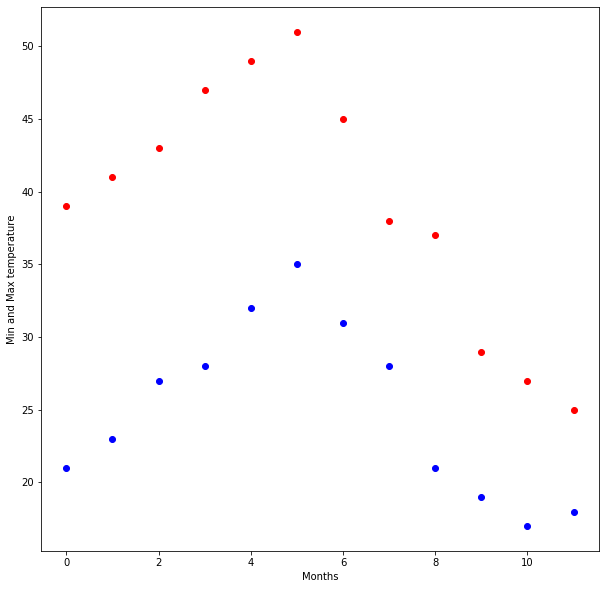

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.figure(figsize = (10,10))
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Months')
plt.ylabel('Min and Max temperature')


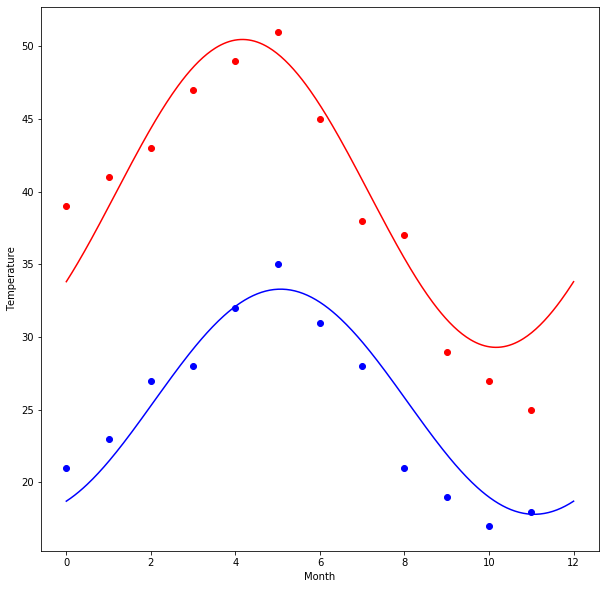

In [3]:
import scipy
from scipy import optimize 

def test_func(times, avg, ampl, time_offset): # a0 + A1*cos(t+phi)*2pie/t.max
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


res_max, cov_max = optimize.curve_fit(test_func, months, max_temp)
res_min, cov_min = optimize.curve_fit(test_func, months, min_temp)

days = np.linspace(0,12,num = 365)

plt.figure(figsize=(10,10))
plt.plot(months, max_temp, 'ro')
plt.plot(days, test_func(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, test_func(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()


Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
s = titanic['sex'].astype('category')
s = s.cat.codes
s

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [6]:
t = s.value_counts()
t

1    577
0    314
dtype: int64

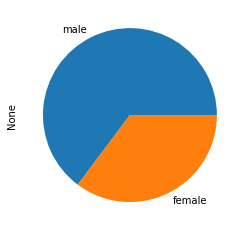

In [7]:
t.plot.pie(labels = ['male','female'])

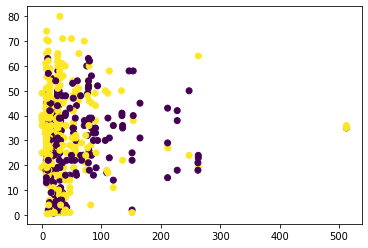

In [8]:
plt.scatter(x = titanic['fare'], y = titanic['age'], c = s)